In [1]:
!pip install -U gdown

In [2]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt

In [3]:
import gdown

file_id = "1En3KB15iD3fapnpg1lsToAxPffqMtoJw"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="combined_orderbooks_eth.csv", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1En3KB15iD3fapnpg1lsToAxPffqMtoJw
From (redirected): https://drive.google.com/uc?id=1En3KB15iD3fapnpg1lsToAxPffqMtoJw&confirm=t&uuid=975e02b5-5788-40a5-9917-e181663668c0
To: /content/combined_orderbooks_eth.csv
100%|██████████| 164M/164M [00:03<00:00, 46.0MB/s]


'combined_orderbooks_eth.csv'

In [4]:
eth_usdt_df = pd.read_csv('combined_orderbooks_eth.csv')
eth_usdt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604801 entries, 0 to 604800
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   timestamp     604801 non-null  int64  
 1   bid_price_1   604801 non-null  float64
 2   bid_size_1    604801 non-null  float64
 3   ask_price_1   604801 non-null  float64
 4   ask_size_1    604801 non-null  float64
 5   bid_price_2   604801 non-null  float64
 6   bid_size_2    604801 non-null  float64
 7   ask_price_2   604801 non-null  float64
 8   ask_size_2    604801 non-null  float64
 9   bid_price_3   604801 non-null  float64
 10  bid_size_3    604801 non-null  float64
 11  ask_price_3   604801 non-null  float64
 12  ask_size_3    604801 non-null  float64
 13  bid_price_4   604801 non-null  float64
 14  bid_size_4    604801 non-null  float64
 15  ask_price_4   604801 non-null  float64
 16  ask_size_4    604801 non-null  float64
 17  bid_price_5   604801 non-null  float64
 18  bid_

In [5]:
eth_usdt_df = pd.read_csv('combined_orderbooks_eth.csv')
eth_usdt_df['datetime'] = pd.to_datetime(eth_usdt_df['timestamp'], unit='s')

In [6]:
eth_usdt_df.set_index('datetime', inplace=True)

In [7]:
eth_usdt_df.head()

,timestamp,bid_price_1,bid_size_1,ask_price_1,ask_size_1,bid_price_2,bid_size_2,ask_price_2,ask_size_2,bid_price_3,...,ask_price_8,ask_size_8,bid_price_9,bid_size_9,ask_price_9,ask_size_9,bid_price_10,bid_size_10,ask_price_10,ask_size_10
datetime,,,,,,,,,,,,,,,,,,,,,
2025-05-01 00:00:00,1746057600,1792.71,25.59,1792.72,57.02,1792.7,0.03,1792.78,1.01,1792.69,...,1792.86,8.17,1792.61,0.44,1792.88,0.02,1792.6,6.05,1792.89,0.01
2025-05-01 00:00:01,1746057601,1792.71,30.00,1792.72,46.51,1792.7,0.03,1792.78,1.01,1792.69,...,1792.86,7.90,1792.61,0.44,1792.88,0.02,1792.6,6.05,1792.89,0.01
2025-05-01 00:00:02,1746057602,1792.71,41.69,1792.72,44.58,1792.7,0.03,1792.77,3.41,1792.69,...,1792.88,0.02,1792.61,0.44,1792.89,1.35,1792.6,6.05,1792.90,9.42
2025-05-01 00:00:03,1746057603,1792.71,34.86,1792.72,44.56,1792.7,0.03,1792.77,2.41,1792.69,...,1792.88,0.02,1792.61,0.44,1792.89,1.35,1792.6,6.05,1792.90,9.42
2025-05-01 00:00:04,1746057604,1792.71,23.94,1792.72,54.74,1792.7,0.03,1792.77,2.41,1792.69,...,1792.88,0.02,1792.61,0.44,1792.89,1.35,1792.6,6.05,1792.90,9.42


In [8]:
eth_usdt_df.shape

(604801, 41)

In [9]:
eth_usdt_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604801 entries, 2025-05-01 00:00:00 to 2025-05-08 00:00:00
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   timestamp     604801 non-null  int64  
 1   bid_price_1   604801 non-null  float64
 2   bid_size_1    604801 non-null  float64
 3   ask_price_1   604801 non-null  float64
 4   ask_size_1    604801 non-null  float64
 5   bid_price_2   604801 non-null  float64
 6   bid_size_2    604801 non-null  float64
 7   ask_price_2   604801 non-null  float64
 8   ask_size_2    604801 non-null  float64
 9   bid_price_3   604801 non-null  float64
 10  bid_size_3    604801 non-null  float64
 11  ask_price_3   604801 non-null  float64
 12  ask_size_3    604801 non-null  float64
 13  bid_price_4   604801 non-null  float64
 14  bid_size_4    604801 non-null  float64
 15  ask_price_4   604801 non-null  float64
 16  ask_size_4    604801 non-null  float64
 17  bid_price_5   

In [10]:
eth_usdt_df.describe()

,timestamp,bid_price_1,bid_size_1,ask_price_1,ask_size_1,bid_price_2,bid_size_2,ask_price_2,ask_size_2,bid_price_3,...,ask_price_8,ask_size_8,bid_price_9,bid_size_9,ask_price_9,ask_size_9,bid_price_10,bid_size_10,ask_price_10,ask_size_10
count,6.048010e+05,604801.000000,604801.000000,604801.000000,604801.000000,604801.000000,604801.000000,604801.000000,604801.000000,604801.000000,...,604801.000000,604801.000000,604801.000000,604801.000000,604801.000000,604801.000000,604801.000000,604801.000000,604801.000000,604801.000000
mean,1.746360e+09,1821.790501,76.528373,1821.800572,75.265378,1821.772660,5.321871,1821.818435,6.553917,1821.756127,...,1821.906029,6.387381,1821.672205,5.975546,1821.918426,6.217473,1821.659902,6.033518,1821.930668,6.702016
std,1.745912e+05,20.326718,251.378052,20.326712,258.727540,20.326561,56.834876,20.326702,103.538802,20.326324,...,20.326942,96.394190,20.325346,72.931849,20.326953,69.967069,20.325227,61.792893,20.326966,86.410042
min,1.746058e+09,1751.100000,0.010000,1751.110000,0.010000,1751.010000,0.010000,1751.130000,0.010000,1750.930000,...,1751.300000,0.010000,1750.850000,0.010000,1751.310000,0.010000,1750.830000,0.010000,1751.330000,0.010000
25%,1.746209e+09,1807.990000,21.850000,1808.000000,20.430000,1807.960000,0.020000,1808.010000,0.020000,1807.950000,...,1808.090000,0.030000,1807.860000,0.020000,1808.100000,0.030000,1807.850000,0.020000,1808.110000,0.030000
50%,1.746360e+09,1826.360000,48.680000,1826.370000,47.870000,1826.350000,0.080000,1826.390000,0.100000,1826.330000,...,1826.470000,0.770000,1826.250000,0.770000,1826.480000,1.060000,1826.230000,1.080000,1826.500000,1.130000
75%,1.746511e+09,1836.040000,81.670000,1836.050000,80.690000,1836.020000,2.800000,1836.070000,2.930000,1836.010000,...,1836.170000,5.490000,1835.930000,5.520000,1836.180000,5.970000,1835.920000,5.840000,1836.190000,6.520000
max,1.746662e+09,1872.700000,7300.770000,1872.710000,9985.320000,1872.650000,7194.210000,1872.720000,7215.820000,1872.640000,...,1872.790000,12202.280000,1872.570000,7249.920000,1872.800000,9946.560000,1872.500000,7249.920000,1872.810000,9946.560000


# Динамика спреда

In [11]:
eth_usdt_df['spread'] = eth_usdt_df['ask_price_1'] - eth_usdt_df['bid_price_1']
eth_usdt_df['spread'].describe()

,spread
count,604801.000000
mean,0.010072
std,0.003027
min,0.010000
25%,0.010000
50%,0.010000
75%,0.010000
max,0.760000


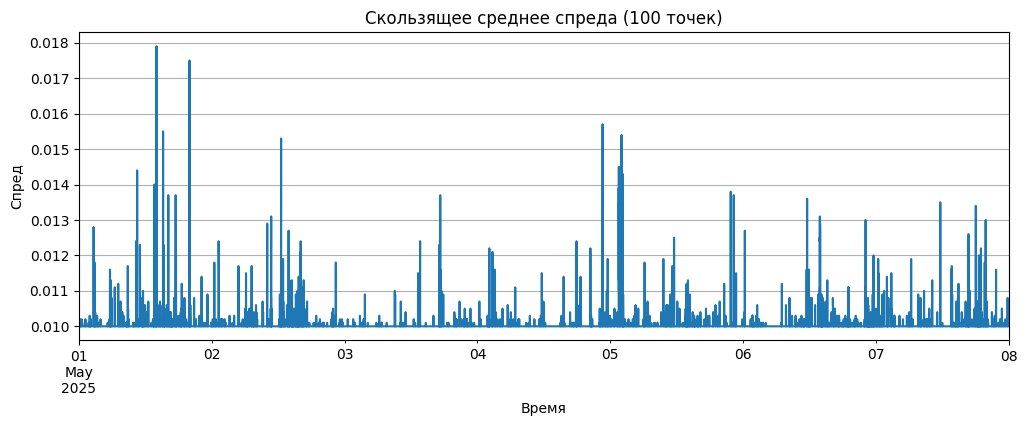

In [14]:
eth_usdt_df['spread'].rolling(100).mean().plot(
    figsize=(12, 4),
    title='Скользящее среднее спреда (100 точек)'
)
plt.xlabel('Время')
plt.ylabel('Спред')
plt.grid(True)
plt.show()

# Средняя глубина стакана

In [15]:
eth_usdt_df['depth_bid'] = eth_usdt_df[[f'bid_size_{i}' for i in range(1, 11)]].sum(axis=1)
eth_usdt_df['depth_ask'] = eth_usdt_df[[f'ask_size_{i}' for i in range(1, 11)]].sum(axis=1)

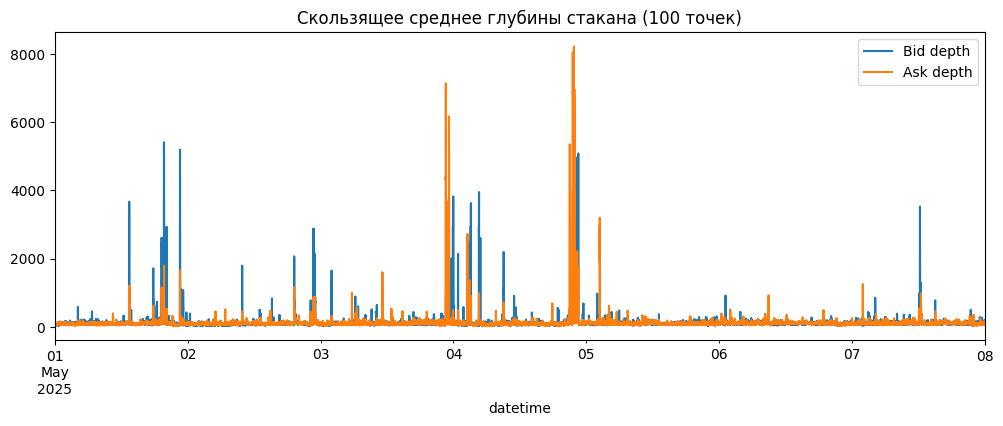

In [16]:
eth_usdt_df['depth_bid'].rolling(100).mean().plot(label='Bid depth', figsize=(12,4))
eth_usdt_df['depth_ask'].rolling(100).mean().plot(label='Ask depth')
plt.title('Скользящее среднее глубины стакана (100 точек)')
plt.legend()
plt.show()

#  Дисбаланс объёмов (Volume Imbalance)

In [17]:
eth_usdt_df['imbalance'] = (eth_usdt_df['depth_bid'] - eth_usdt_df['depth_ask']) / \
                           (eth_usdt_df['depth_bid'] + eth_usdt_df['depth_ask'])

In [18]:
eth_usdt_df['imbalance']

,imbalance
datetime,
2025-05-01 00:00:00,-0.427048
2025-05-01 00:00:01,-0.309598
2025-05-01 00:00:02,-0.303552
2025-05-01 00:00:03,-0.349530
2025-05-01 00:00:04,-0.517894
...,...
2025-05-07 23:59:56,-0.040312
2025-05-07 23:59:57,-0.751169
2025-05-07 23:59:58,-0.367231


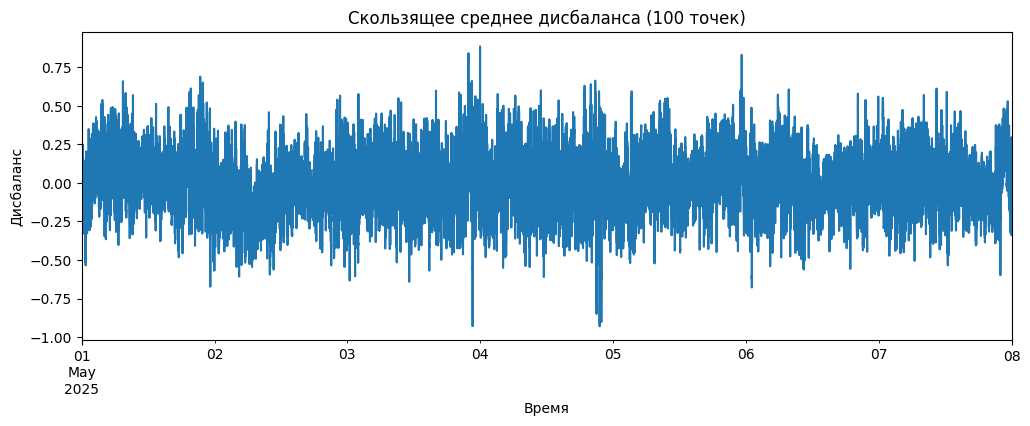

In [19]:
eth_usdt_df['imbalance'].rolling(100).mean().plot(figsize=(12, 4), title='Скользящее среднее дисбаланса (100 точек)')
plt.xlabel('Время')
plt.ylabel('Дисбаланс')
plt.show()

# Проверка корреляции дисбаланса с будущими движениями цены

In [20]:
eth_usdt_df['mid_price'] = (eth_usdt_df['bid_price_1'] + eth_usdt_df['ask_price_1']) / 2
eth_usdt_df['future_mid_price'] = eth_usdt_df['mid_price'].shift(-10)
eth_usdt_df['price_move'] = (eth_usdt_df['future_mid_price'] - eth_usdt_df['mid_price']).apply(
    lambda x: 1 if x > 0 else (-1 if x < 0 else 0)
)

In [21]:
eth_usdt_df.groupby('price_move')['imbalance'].mean()

,imbalance
price_move,
-1,-0.124088
0,0.003933
1,0.118633


# boxplot дисбаланса по меткам движения

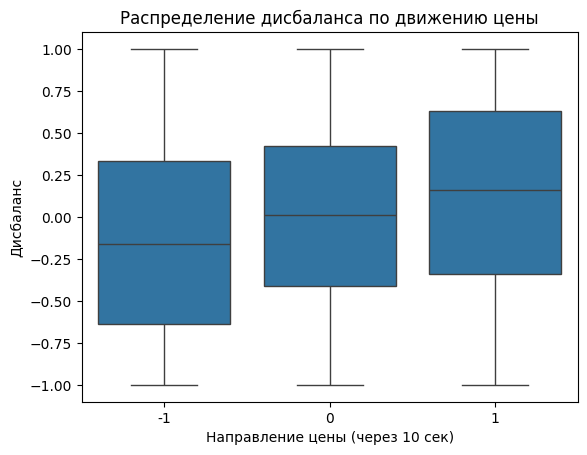

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=eth_usdt_df, x='price_move', y='imbalance')
plt.title('Распределение дисбаланса по движению цены')
plt.xlabel('Направление цены (через 10 сек)')
plt.ylabel('Дисбаланс')
plt.show()

# Локальная волатильность

In [23]:
eth_usdt_df['volatility'] = eth_usdt_df['mid_price'].rolling(100).std()

# Обнаружение аномалий

## Выбросы по IQR

In [24]:
# Функция поиска выбросов по интерквартильному размаху
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

In [25]:
eth_usdt_df['spread_outlier'] = detect_outliers_iqr(eth_usdt_df['spread'])
eth_usdt_df['depth_bid_outlier'] = detect_outliers_iqr(eth_usdt_df['depth_bid'])
eth_usdt_df['imbalance_outlier'] = detect_outliers_iqr(eth_usdt_df['imbalance'])

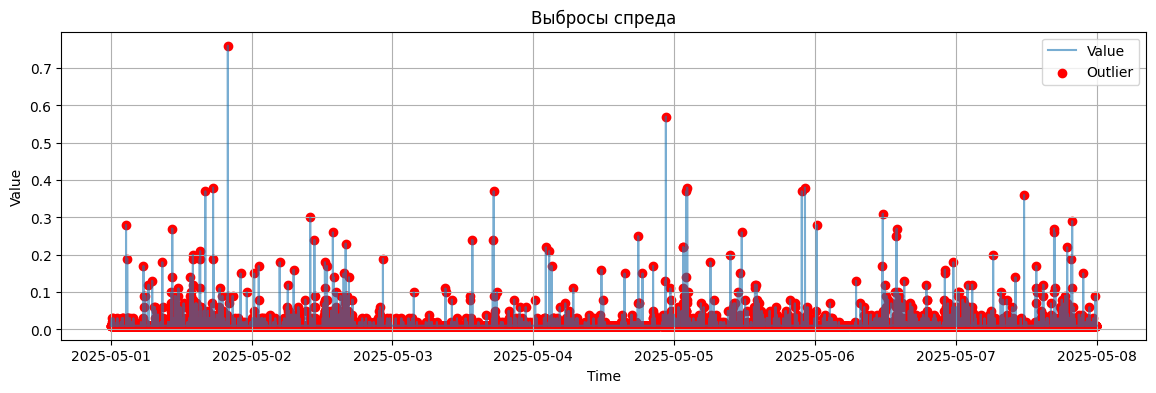

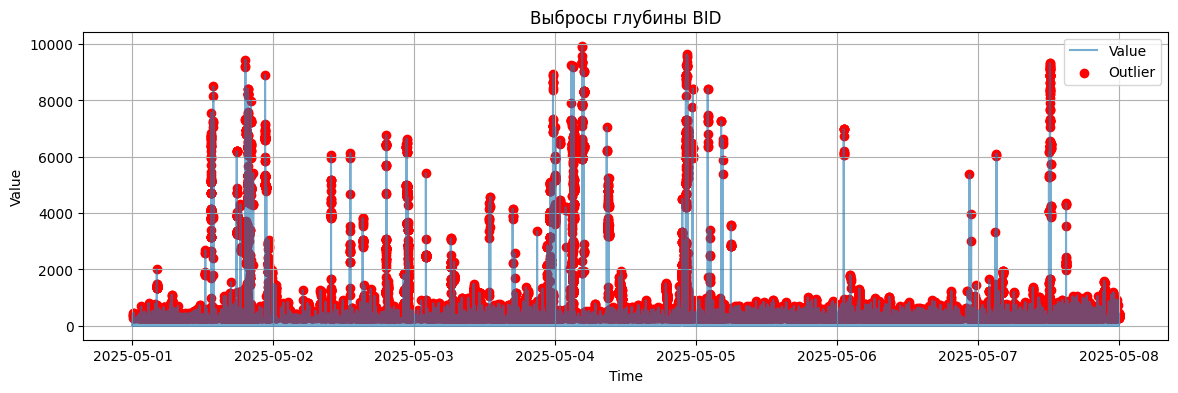

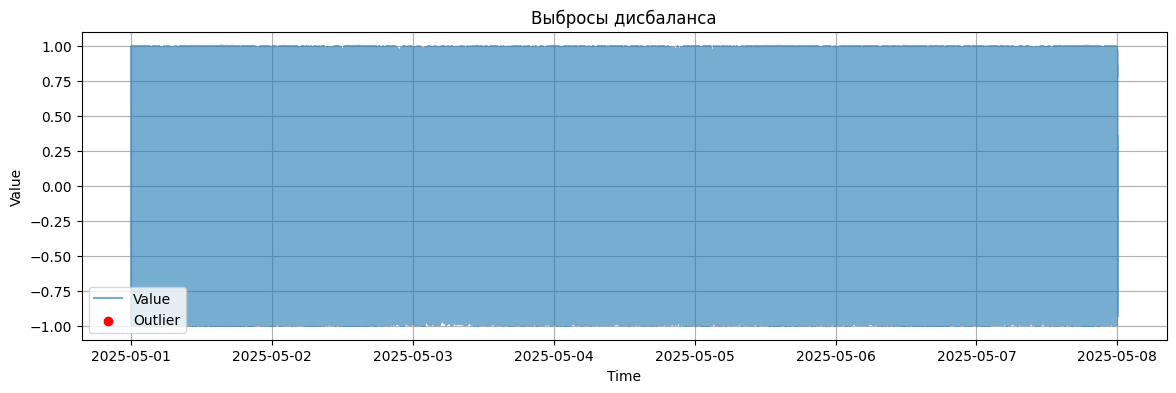

In [26]:
def plot_with_outliers(series, outlier_mask, title):
    plt.figure(figsize=(14, 4))
    plt.plot(series.index, series, label='Value', alpha=0.6)
    plt.scatter(series.index[outlier_mask], series[outlier_mask], color='red', label='Outlier')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_with_outliers(eth_usdt_df['spread'], eth_usdt_df['spread_outlier'], "Выбросы спреда")
plot_with_outliers(eth_usdt_df['depth_bid'], eth_usdt_df['depth_bid_outlier'], "Выбросы глубины BID")
plot_with_outliers(eth_usdt_df['imbalance'], eth_usdt_df['imbalance_outlier'], "Выбросы дисбаланса")

1. Аномалии спреда

На графике с выбросами спреда:

- Спред (разница между лучшей ценой на продажу и покупку) имеет редкие, но резкие всплески — до 0.7.

- Большинство данных находятся в пределах 0.01–0.015.

- Вывод: пики указывают на моменты резкого изменения ликвидности или манипулятивной активности. Эти участки потенциально интересны для дальнейшего анализа и фильтрации обучающей выборки.

2. Аномалии глубины BID

- Значения глубины на стороне покупок (depth_bid) также содержат выраженные выбросы (до 10000), которые визуализированы точками.

- Вывод: всплески глубины — вероятные следы крупных ордеров или spoofing-активности (ложных заявок для введения в заблуждение).

3. Дисбаланс и его стабильность

- График outliers для дисбаланса не имеет выбросов, потому что все значения лежат строго в пределах от -1 до 1 по определению. Значения ±1 — это состояния полной асимметрии: весь объем либо в ask, либо в bid.

- Однако, скользящее среднее дисбаланса показывает интересные колебания, что может быть признаком смены направления интереса участников рынка.

4. Связь дисбаланса и будущего движения цены

Средние значения дисбаланса по классам:

- Цена выросла (1): средний дисбаланс положительный (≈ 0.118)

- Цена упала (-1): средний дисбаланс отрицательный (≈ -0.124)

- Без изменения (0): около нуля

Boxplot подтверждает:

- Чем выше дисбаланс в сторону покупателей → тем выше шанс роста цены;

- При дисбалансе в сторону продавцов → чаще наблюдается снижение.

# Labeling

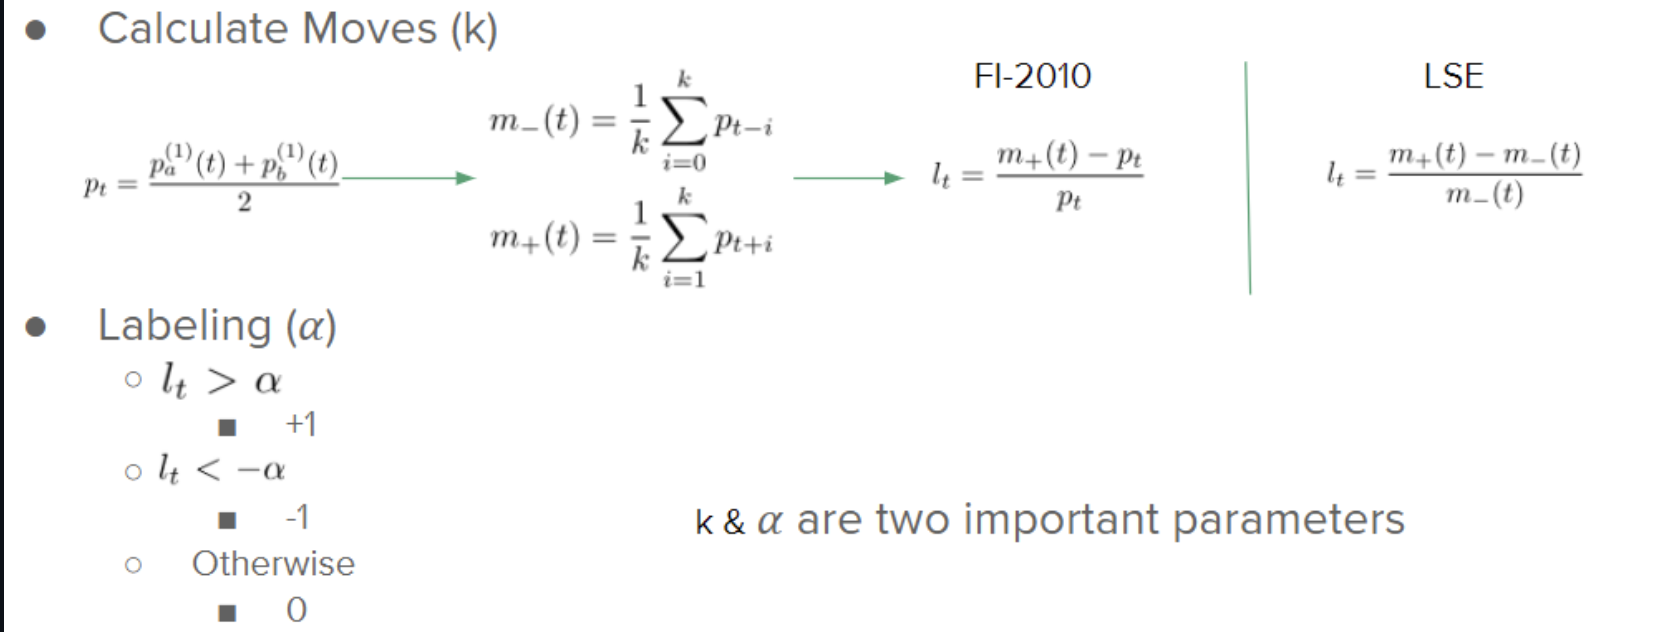

Мы используем метод для LSE

In [27]:
def label_lse(df, k=10, alpha=0.0005):
    df = df.copy()

    # Вычисляем mid-price (среднюю цену между лучшим бидом и аском)
    # df['mid_price'] = (df['bid_price_1'] + df['ask_price_1']) / 2

    # Вычисляем m_minus — скользящее среднее по предыдущим k mid-price
    df['m_minus'] = df['mid_price'].rolling(window=k).mean()

    # Вычисляем m_plus — скользящее среднее по будущим k mid-price
    # Для этого берём ту же rolling-mean и сдвигаем назад (в будущее)
    df['m_plus'] = df['mid_price'].rolling(window=k).mean().shift(-k + 1)

    # Считаем значение изменения цены lt по формуле из статьи (LSE метод)
    df['lt'] = (df['m_plus'] - df['m_minus']) / df['m_minus']

    # Инициализируем столбец меток как 0 (нулевое движение)
    df['label'] = 0

    # Присваиваем метку 1, если прирост выше порога alpha
    df.loc[df['lt'] > alpha, 'label'] = 1

    # Присваиваем метку -1, если падение ниже -alpha
    df.loc[df['lt'] < -alpha, 'label'] = -1

    # Удаляем строки, где не удалось посчитать lt или метку (из-за NaN в скользящих средних)
    return df.dropna(subset=['lt', 'label'])

In [28]:
eth_usdt_df_labeled = label_lse(eth_usdt_df, k=10, alpha=0.0005)

# Анализ распределения классов
print(eth_usdt_df_labeled['label'].value_counts(normalize=True))

label
 0    0.971921
-1    0.014099
 1    0.013980
Name: proportion, dtype: float64


Подавляющее большинство наблюдений помечены как "0" (стабильность), то есть изменение mid-price в пределах допустимого α=0.0005.

Вывод: рынок ETH/USDT за анализируемый период в основном находился в стационарном состоянии, без ярко выраженных краткосрочных направленных движений.

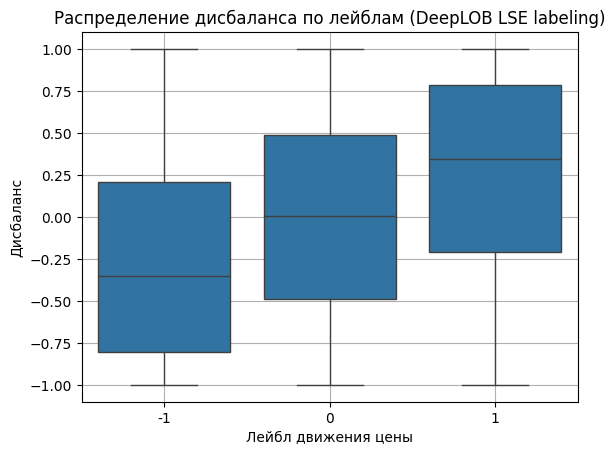

In [29]:
# Boxplot дисбаланса по классам
sns.boxplot(data=eth_usdt_df_labeled, x='label', y='imbalance')
plt.title('Распределение дисбаланса по лейблам (DeepLOB LSE labeling)')
plt.xlabel('Лейбл движения цены')
plt.ylabel('Дисбаланс')
plt.grid(True)
plt.show()

Что видно:

- Чем выше дисбаланс, тем выше вероятность роста цены.

- Аналогично, при выраженном негативном дисбалансе цена скорее падает.

- Диапазон значений дисбаланса при метке 0 широк, что логично — нет выраженного сигнала в какую сторону двигаться.

In [30]:
# Среднее значение дисбаланса по каждому классу
print(eth_usdt_df_labeled.groupby('label')['imbalance'].mean())

label
-1   -0.247771
 0   -0.000423
 1    0.246571
Name: imbalance, dtype: float64


- При отрицательном движении цены средний дисбаланс отрицательный → больше продавцов.

- При положительном движении — дисбаланс положительный → доминируют покупатели.

- При нулевом изменении дисбаланс почти нейтральный.

Вывод: метка imbalance хорошо коррелирует с направлением движения цены, что подтверждает его предиктивную силу. Это значит, что дисбаланс может быть полезным входным признаком (feature) при обучении модели.